In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Dropout, BatchNormalization

In [240]:
df = pd.read_csv('/content/IRFC.NS.csv')

In [241]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363665,381938573
1,2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622097,72044464
2,2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320595,36735442
3,2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889872,45816269
4,2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029


In [242]:
df['Date'] = pd.to_datetime(df['Date'])

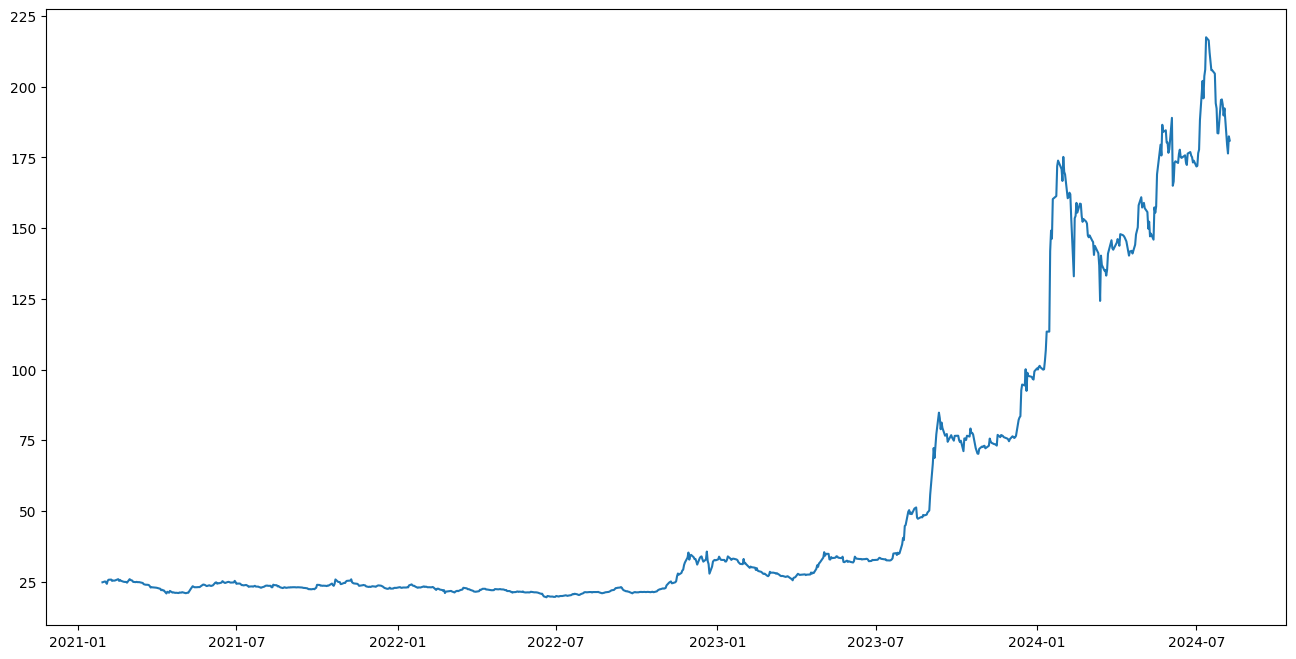

In [243]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'], label='Close Price history')

In [244]:
new_df = df[df['Date'] >= '2022-08-01']

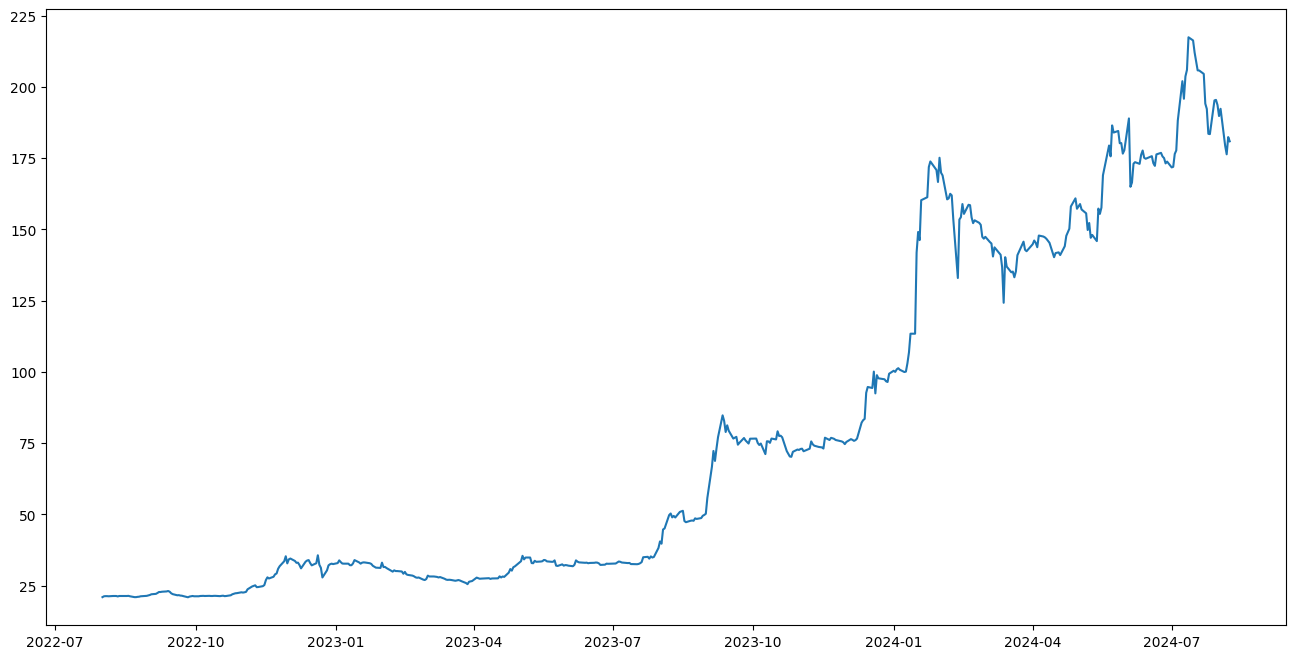

In [245]:
plt.figure(figsize=(16,8))
plt.plot(new_df['Date'], new_df['Close'], label='Close Price history')

In [246]:
moving_15 = new_df['Close'].rolling(window =15).mean()
moving_30 = new_df['Close'].rolling(window =30).mean()

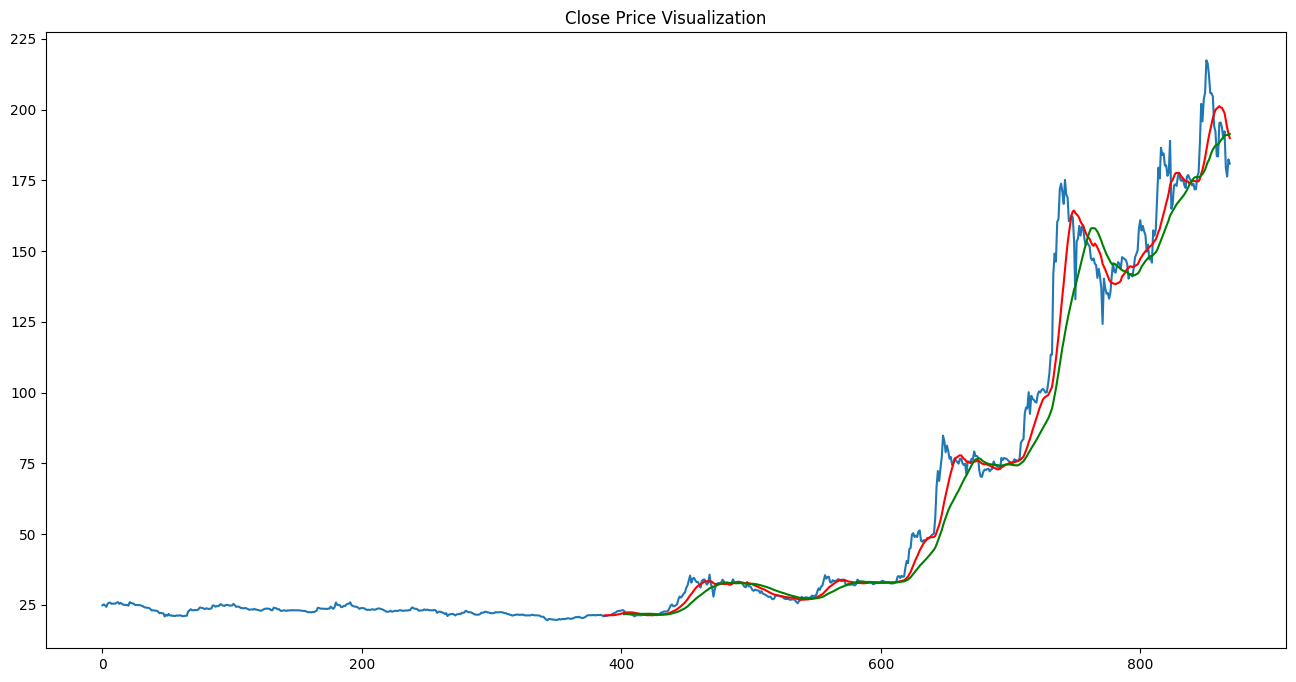

In [247]:
plt.figure(figsize = (16,8))
plt.title("Close Price Visualization")
plt.plot(df['Close'])
plt.plot(moving_15, 'r')
plt.plot(moving_30, 'g')
plt.show()

In [248]:
new_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [249]:
train = new_df[0:int(len(new_df)*0.8)]
valid = new_df[int(len(new_df)*0.8):]

In [250]:
scaler = MinMaxScaler(feature_range=(0,1))

In [251]:
testing_scalled_data = scaler.fit_transform(new_df['Close'].values.reshape(-1,1))
valid_scalled_data = scaler.fit_transform(valid['Close'].values.reshape(-1,1))

In [252]:
x_train = []
y_train = []
steps = 30
for i in range(steps, len(testing_scalled_data)):
  x_train.append(testing_scalled_data[i-steps:i])
  y_train.append(testing_scalled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [253]:
x_train.shape

(467, 30, 1)

In [265]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'tanh', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'tanh', return_sequences=False))
model.add(Dropout(0.2))

# model.add(LSTM(units = 50, activation = 'relu', return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [266]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train ,epochs = 50,)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - MAE: 0.1750 - loss: 0.0731
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - MAE: 0.0667 - loss: 0.0089
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - MAE: 0.0479 - loss: 0.0061
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - MAE: 0.0373 - loss: 0.0041
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - MAE: 0.0421 - loss: 0.0043
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - MAE: 0.0421 - loss: 0.0048
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - MAE: 0.0424 - loss: 0.0042
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - MAE: 0.0392 - loss: 0.0037
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - MAE: 0.0409 - loss: 0.0041
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - MAE: 0.0360 - loss: 0.0032
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - MAE: 0.0347 - loss: 0.0033
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - MAE: 0.0391 - loss: 0.0044
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━

In [267]:
test_close = valid['Close']
train_close = train['Close']
past_30_days = pd.DataFrame(train_close[-30:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_30_days, test_df], ignore_index=True)
test_data = scaler.fit_transform(final_df)

In [268]:
x_test = []
y_test = []
for i in range(30, test_data.shape[0]):
   x_test.append(test_data[i-30: i])
   y_test.append(test_data[i, 0])

In [269]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(100, 30, 1)
(100,)


In [270]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


In [271]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

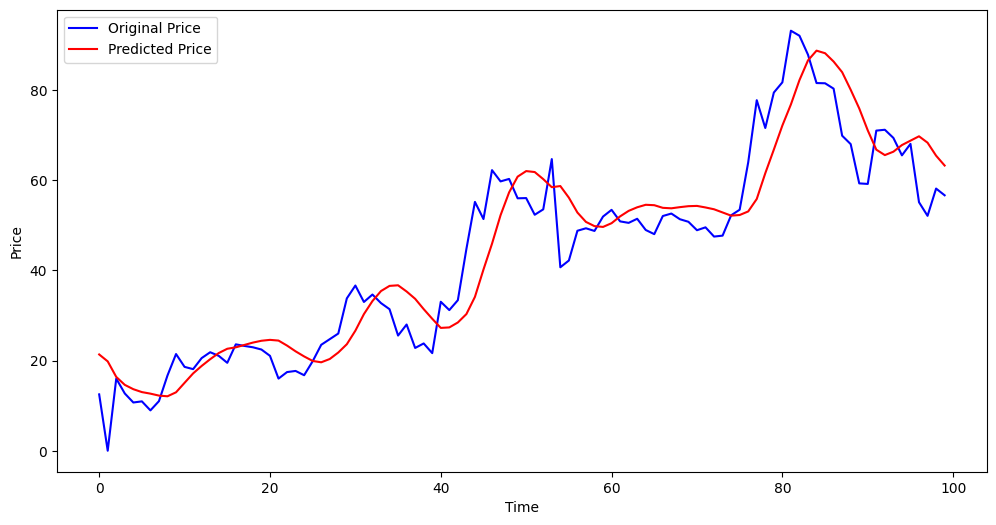

In [272]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [273]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('MSE:', mse)

R-squared: 0.8633083983285247
MSE: 65.39919468550073
